### 1.Problem Statement

In this assignment students have to find the frequency of words in a webpage. 
User can use urllib and BeautifulSoup to extract text from webpage.


In [29]:
#importing libraries
from bs4 import BeautifulSoup 
import urllib.request
import nltk
import matplotlib.pyplot as plt
import nltk
import pandas as pd


response = urllib.request.urlopen('http://php.net/') 
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [43]:
#parsing the webpage for the required text
text=[]
for i in soup.findAll('article',{'class':"newsentry"}):
    text.append(i.text)

In [21]:
#Text cleaning
import re

text_cleaned=[]
for string in text:
    
    str1=' '.join(string.split())
    str3=re.sub(r'\s',' ',str1)
    str4=re.sub(r'[^a-zA-Z\s]',' ',str3)
    str5=str4.split()
    for i in str5:
        text_cleaned.append(i)

In [22]:
len(text_cleaned)

2553

In [25]:
text_cleaned[:10]

['Jan',
 'PHP',
 'Released',
 'The',
 'PHP',
 'development',
 'team',
 'announces',
 'the',
 'immediate']

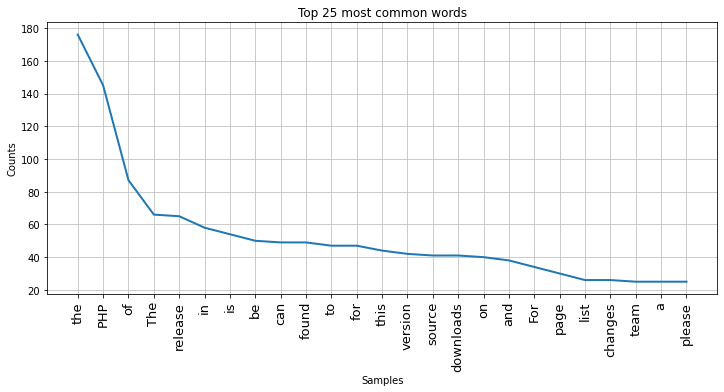

<AxesSubplot:title={'center':'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [27]:
#Plotting the top 25 most frequent words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13,rotation=90)
fd=nltk.FreqDist(text_cleaned)
fd.plot(25,cumulative=False)

In [49]:
#creating a dataframe with the frequency of all words
df_frequency=pd.DataFrame([fd]).transpose()
df_frequency.rename(columns={0:'Frequency'},inplace=True)
df_frequency.sort_values(by='Frequency',ascending=False).head()

,Frequency
the,176
PHP,145
of,87
The,66
release,65
